# Rosetta Overheads on Apple M1

In [1]:
%matplotlib inline

In [2]:
import sys

import pandas

In [3]:
sys.path.append('..')
import limeleadlib.benchmarks_json as benchmarks

In [4]:
all_results = pandas.DataFrame.from_dict(benchmarks.load_datasets(["../content/data/benchmarks/arm_processors.yaml"]))

In [5]:
grouped = all_results.groupby('model').get_group("MacBook Air M1").groupby('processor')

In [6]:
native_key = None
rosetta_key = None

wall_secs = None
for processor, dataframe in grouped:
    if 'rosetta' in processor.lower():
        rosetta_key = processor
    else:
        native_key = processor
    series = dataframe[['cores_used', 'wall_secs']].set_index('cores_used').iloc[:, 0]
    series.name = processor
    if wall_secs is None:
        wall_secs = series.to_frame()
    else:
        wall_secs = pandas.concat((wall_secs, series), axis=1)

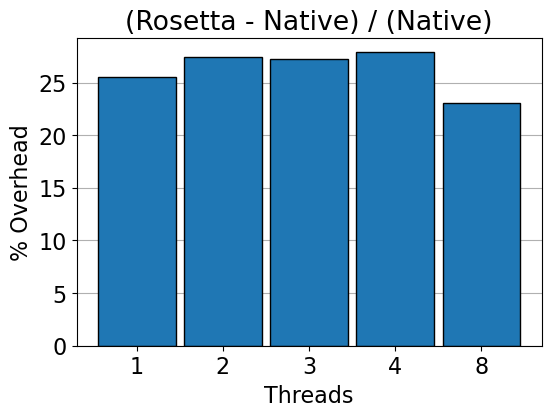

In [7]:
ax = (100.0 * ((wall_secs[rosetta_key] / wall_secs[native_key]) - 1.0)).plot.bar(width=0.9, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("Threads")
ax.set_ylabel("% Overhead")
ax.set_title("(Rosetta - Native) / (Native)")
ax.yaxis.grid()
ax.set_axisbelow(True)